#### Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# Import the Training and Validation set
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# The Data types of each Column
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
#To check if there is any null value in any of the column
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


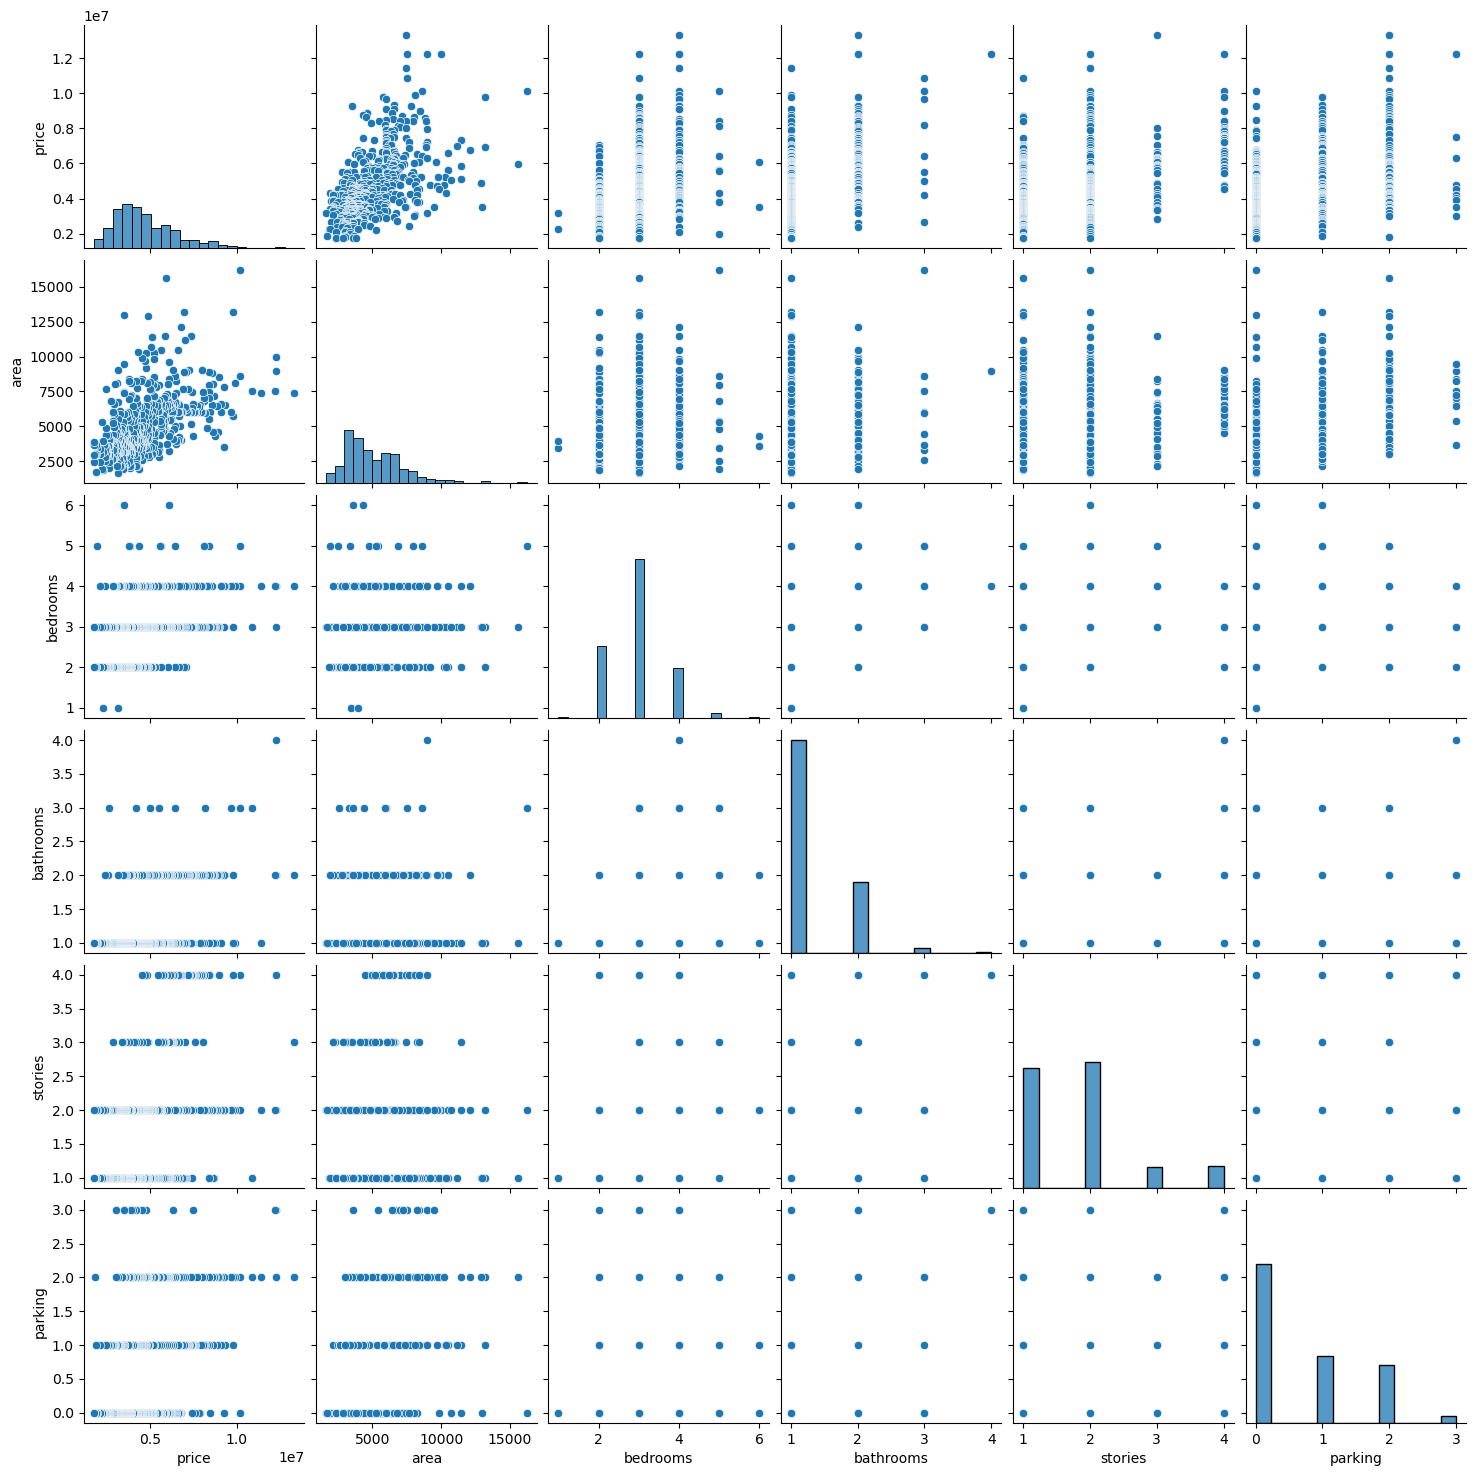

In [6]:
#To pair each column in order to visualize the relationship between each column 
sns.pairplot(df)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Mapping:

Here we are going to change all columns that contains the strings "Yes" and "No" into 1 and 0.

In [8]:
# Define mappings for each categorical column
mappings = {
    'mainroad': {'yes': 1, 'no': 0},
    'guestroom': {'yes': 1, 'no': 0},
    'basement': {'yes': 1, 'no': 0},
    'hotwaterheating': {'yes': 1, 'no': 0},
    'airconditioning': {'yes': 1, 'no': 0},
    'prefarea': {'yes': 1, 'no': 0}
}
 
# Apply mappings to each column
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)


In [9]:
#checking to see the dataframe after the mapping
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


### Statistical Analysis of the dataset

In [10]:
#Statistical analysis using the Tranpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


### Label Encoding

Here we are trying to change the column  "furnishingstatus" contents into "0","1",and "2" in order of in importance..


- furnished == 2
- semi-furnished == 1
- unfurnished == 0

In [11]:
# Label Encoding

df['furnishingstatus'] = [0 if status == 'unfurnished' else 1 if status == 'semi-furnished' else 2 for status in df['furnishingstatus']]


In [12]:
#checking to see the dataset after the label Encoding
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


### Correlation Heatmap


**In this code segment we will generates a heatmap visualizing the correlation between numerical variables in the DataFrame, helping to identify patterns of association or dependence between different features.**

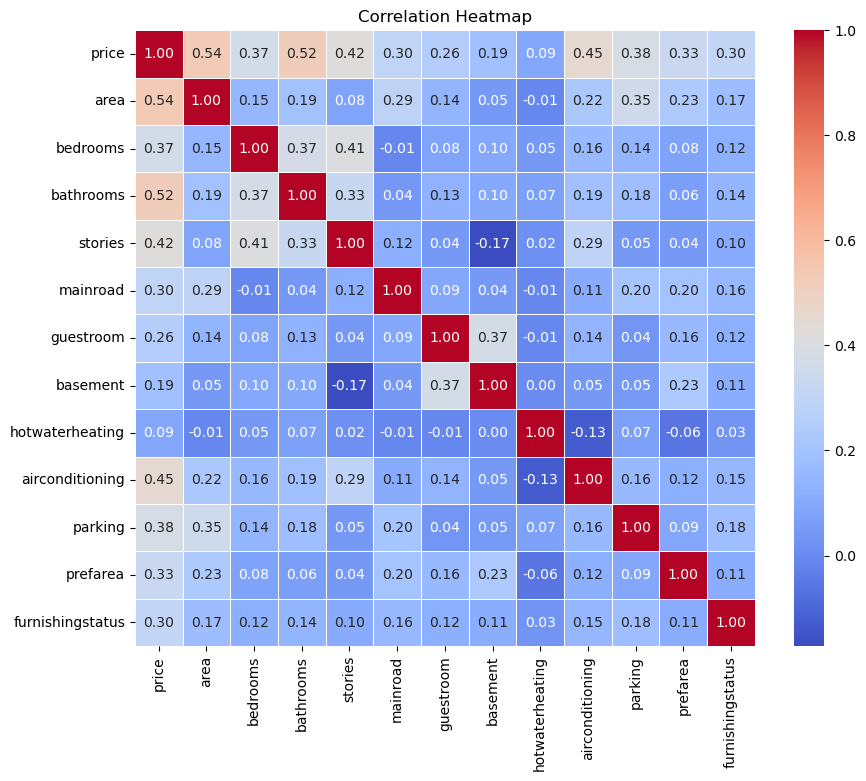

<Figure size 640x480 with 0 Axes>

In [13]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
 
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight");

### Defining our X and Y 

In [14]:
# The target column is "y"  and the variables is "X"
X = df.drop('price', axis = 1)
y = df['price']

### Building Our Model...
Here two set of model will be utilized namely:
- Linear Regression 
- RandomforestRegressor 

In [15]:
#We need to shuffle our data
#df_shuffled = df.sample(frac=1)

# Define functions
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels ves y_pred labels on a Regression
    '''
    r2 = r2_score(y_true,y_preds) 
    mae = mean_absolute_error(y_true,y_preds)
    mse = mean_squared_error(y_true,y_preds)
    metric_dict = {'R Squared':round(r2,2),
                  "Mean absolute Error":round(mae,2),
                  "Mean Squared Error":round(mse,2)}
    #print(f"R Squared:{r2 * 100:.2f}%")
    #print(f"Mean absolute Error:{mae:.2f}")
    #print(f"Mean Squared Error:{mse:.2f}")
          
    return metric_dict  

### Using Linear Regression

In [16]:
np.random.seed(42)
 
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
#Define model
Lr_model = LinearRegression()
 
#Fit model
Lr_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Using Predict function to predict the test
y_preds = Lr_model.predict(X_test)

In [18]:
lr_baseline = evaluate_preds(y_test,y_preds)

### Using Random Forest Regressor

In [19]:
np.random.seed(42)
 
#Creating a Randomforest model
Rf_model =RandomForestRegressor()
 
#fit the model
Rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
# Using Predict function to predict the test
y_preds_2 = Rf_model.predict(X_test)

In [21]:
rf_baseline = evaluate_preds(y_test,y_preds_2)

### Tuning Our Model (Hypreparameters)

### Tuning on Linear Regression

In [22]:
np.random.seed(42)

param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False]}
 
#Define model
Lr_model_2 = LinearRegression()

# Setup RandomizedSearchCV
rs_Lr_model_2 = GridSearchCV(Lr_model_2, param_grid= param_grid, cv=5)
 
#Fit Randomized model
rs_Lr_model_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [23]:
# To see the best parameter combination
rs_Lr_model_2.best_params_

{'copy_X': True, 'fit_intercept': False}

In [24]:
# Using Predict function to predict the test
y_preds_3 = rs_Lr_model_2.predict(X_test)

In [25]:
lr_gs = evaluate_preds(y_test,y_preds_3)

### Tuning  on Random Forest Regressor

In [26]:
# Creating a Dict for our Grid
grid_2 = {'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [6],
 'n_estimators': [100, 200, 500]}

In [27]:
np.random.seed(42)
 
#Define model
Rf_model_2 = RandomForestRegressor(n_jobs = -1)

# Setup RandomizedSearchCV
gs_Rf_model_2 = GridSearchCV(estimator = Rf_model_2,
                    param_grid = grid_2,
                    cv = 5,
                    verbose = 2)
#Fit Randomized model
gs_Rf_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\okeya\anaconda3\Lib\site-packages\

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [28]:
# To see the best parameter combination
gs_Rf_model_2.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [29]:
# Using Predict function to predict the test
y_preds_4 = gs_Rf_model_2.predict(X_test)

In [30]:
rf_gs = evaluate_preds(y_test,y_preds_4)

### Using shuffled data
Our Model did not improve after Tuning, so we will reshuffle the dataset, then fit the models all over again to see if our score will improve

In [31]:
np.random.seed(42)
df_shuffled = df.sample(frac = 1)

In [32]:
# The target column is "y"  and the variables is "X"
X = df_shuffled.drop('price', axis = 1)
y = df_shuffled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear Regression

In [33]:
np.random.seed(42)

param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False]}
 
#Define model
Lr_model_3 = LinearRegression()

# Setup RandomizedSearchCV
rs_Lr_model_3 = GridSearchCV(Lr_model_3, param_grid= param_grid, cv=5)
 
#Fit Randomized model
rs_Lr_model_3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [34]:
rs_Lr_model_3.best_params_

{'copy_X': True, 'fit_intercept': False}

In [35]:
# Using Predict function to predict the test
y_preds_6 = rs_Lr_model_3.predict(X_test)

In [36]:
lr_sh_gs = evaluate_preds(y_test,y_preds_6)

### Random Forest Regressor

In [37]:
np.random.seed(42)
 
#Define model
Rf_model_2 = RandomForestRegressor(n_jobs = -1)

# Setup RandomizedSearchCV
gs_Rf_model_2 = GridSearchCV(estimator = Rf_model_2,
                    param_grid = grid_2,
                    cv = 5,
                    verbose = 2)
#Fit Randomized model
gs_Rf_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\okeya\anaconda3\Lib\site-packages\

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [38]:
# To see the best parameter combination
gs_Rf_model_2.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [39]:
# Using Predict function to predict the test
y_preds_5 = gs_Rf_model_2.predict(X_test)

In [40]:
rf_sh_gs = evaluate_preds(y_test,y_preds_5)

### Compare the outcomes of our models

In [41]:
compare_matrics = pd.DataFrame({'baseline_LR': lr_baseline,
                                'baseline_RF': rf_baseline,
                                'GridS_LR':lr_gs,
                                'GridS_RF': rf_gs,
                                'Shuffled_lR': lr_sh_gs,
                                'Shuffled_RF':rf_sh_gs})
compare_matrics

,baseline_LR,baseline_RF,GridS_LR,GridS_RF,Shuffled_lR,Shuffled_RF
R Squared,6.500000e-01,6.100000e-01,6.500000e-01,6.100000e-01,7.400000e-01,6.900000e-01
Mean absolute Error,9.796797e+05,1.024081e+06,9.812272e+05,1.031966e+06,7.545492e+05,7.629035e+05
Mean Squared Error,1.771751e+12,1.956925e+12,1.781472e+12,1.960116e+12,1.175082e+12,1.400806e+12


### Conclusion

### Save

In [43]:
# Save the model to a file
joblib.dump(Lr_model_3, 'Linear Regression_model.pkl')

['Linear Regression_model.pkl']